In [1]:
from catboost import CatBoostRegressor, Pool
import pandas as pd

In [2]:
full_data = pd.read_csv('full_data.csv')
full_data.head(2)

,region,num_sessions,installs,orders,revenue,revenue_quartile,region_russian,revenue_per_order,gmv,conversion,...,городские мужчины в трудоспособном возрасте,городские мужчины в трудоспособном возрасте.1,городские женщины,городские женщины моложе трудоспособного возраста,городские женщины в трудоспо-собном возрасте,городские женщины старше трудоспо-собного возраста,оценка туристского потока (число поездок),оценка туристского потока (число ночевок),доход от гостиниц/отелей/хостелов в год (тыс),число турфирм
0,Krasnodar Krai,1.000000,1.000000,1.000000,1.00000,Very High,Краснодарский край,1.000000,1.000000,1.000000,...,984540,237541,1765674,317201,921860,526613,18072510,100110964,149338428.0,473
1,Sverdlovsk Oblast,0.506194,0.457039,0.337536,0.40821,Very High,Свердловская область,1.348129,0.137786,0.666812,...,1069919,247016,1973918,348022,1017189,608707,3157004,10185979,13029768.2,454


In [3]:
X_revenue_per_order = full_data.drop(columns=['region', 'region_russian', 'revenue', 'revenue_quartile', 'revenue_per_order', 'avg_check'])
y_revenue_per_order = full_data['revenue_per_order']

In [5]:
model_revenue_per_order = CatBoostRegressor(random_state=42, verbose=300).fit(X_revenue_per_order, y_revenue_per_order)

Learning rate set to 0.028227
0:	learn: 0.3874574	total: 19.3ms	remaining: 19.3s
300:	learn: 0.0468840	total: 1.35s	remaining: 3.13s
600:	learn: 0.0093398	total: 2.59s	remaining: 1.72s
900:	learn: 0.0022841	total: 3.74s	remaining: 411ms
999:	learn: 0.0015704	total: 4.18s	remaining: 0us


In [6]:
ft = model_revenue_per_order.get_feature_importance(prettified=True)
ft

,Feature Id,Importances
0,conversion,11.891068
1,число турфирм,6.659947
2,tour_feat_rating_std,5.966542
3,installs,5.280465
4,num_sessions,4.605080
5,nature_feat_rating_std,4.270631
6,женщины старше трудоспособного возраста,4.009506
7,orders,3.892699
8,20тый персентиль дохода,3.251397
9,население с доходом ниже границы бедности,2.345027


/home/era/Desktop/tutu_hack/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


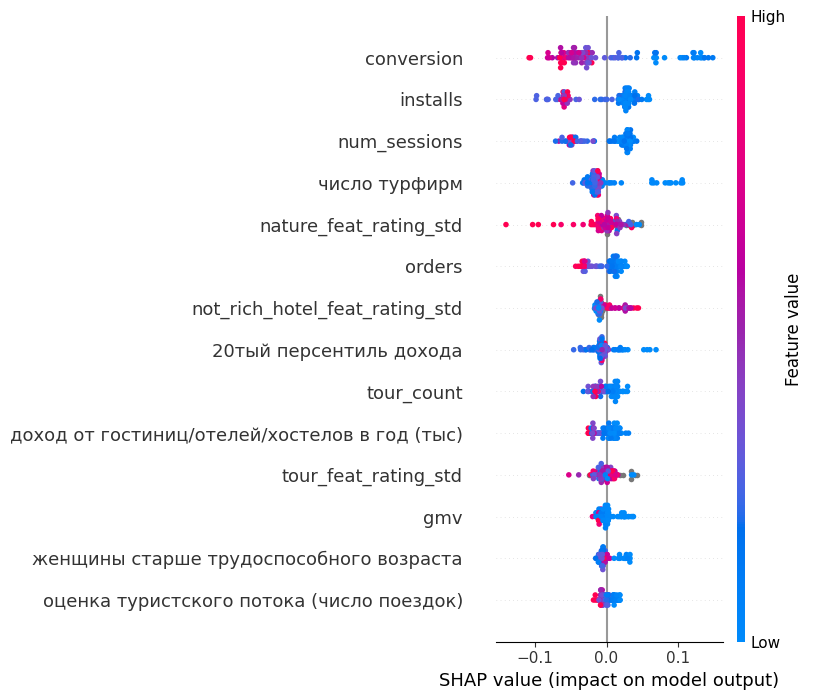

In [7]:
import shap

explainer = shap.TreeExplainer(model_revenue_per_order)

val_dataset = Pool(data=X_revenue_per_order, label=y_revenue_per_order)
shap_values = explainer.shap_values(val_dataset)
shap.summary_plot(shap_values, X_revenue_per_order, max_display = 14)

In [8]:
revenue_features = ft['Feature Id'][:25]
X_revenue_per_order_selected = X_revenue_per_order[revenue_features]

In [9]:
model = CatBoostRegressor(random_state=42, verbose=100).fit(X_revenue_per_order_selected, y_revenue_per_order)

Learning rate set to 0.028227
0:	learn: 0.3869189	total: 4.91ms	remaining: 4.91s


100:	learn: 0.1459684	total: 249ms	remaining: 2.22s
200:	learn: 0.0786734	total: 470ms	remaining: 1.87s
300:	learn: 0.0463759	total: 798ms	remaining: 1.85s
400:	learn: 0.0313043	total: 1.03s	remaining: 1.54s
500:	learn: 0.0195083	total: 1.24s	remaining: 1.24s
600:	learn: 0.0121759	total: 1.49s	remaining: 987ms
700:	learn: 0.0079035	total: 1.73s	remaining: 737ms
800:	learn: 0.0051300	total: 1.96s	remaining: 486ms
900:	learn: 0.0035020	total: 2.18s	remaining: 239ms
999:	learn: 0.0023029	total: 2.4s	remaining: 0us


In [10]:
ft = model.get_feature_importance(prettified=True)
ft['Feature Id'].values

array(['conversion', 'installs', 'nature_feat_rating_std',
       'число турфирм', 'orders', 'tour_feat_rating_std',
       'городские женщины старше трудоспо-собного возраста',
       'старше трудоспособного возраста', 'num_sessions', 'gmv',
       'население с доходом ниже границы бедности',
       'доход от гостиниц/отелей/хостелов в год (тыс)',
       '20тый персентиль дохода',
       'женщины старше трудоспособного возраста',
       'оценка туристского потока (число ночевок)', 'Возраст от 51 до 60',
       '40ой персентиль дохода', '80тый персентиль дохода',
       'мужчины моложе трудоспособного возраста.1',
       '60тый персентиль дохода', 'nature_feat_rating_mean', 'tour_count',
       'средний доход',
       'городские женщины моложе трудоспособного возраста',
       'not_rich_hotel_feat_rating_std'], dtype=object)

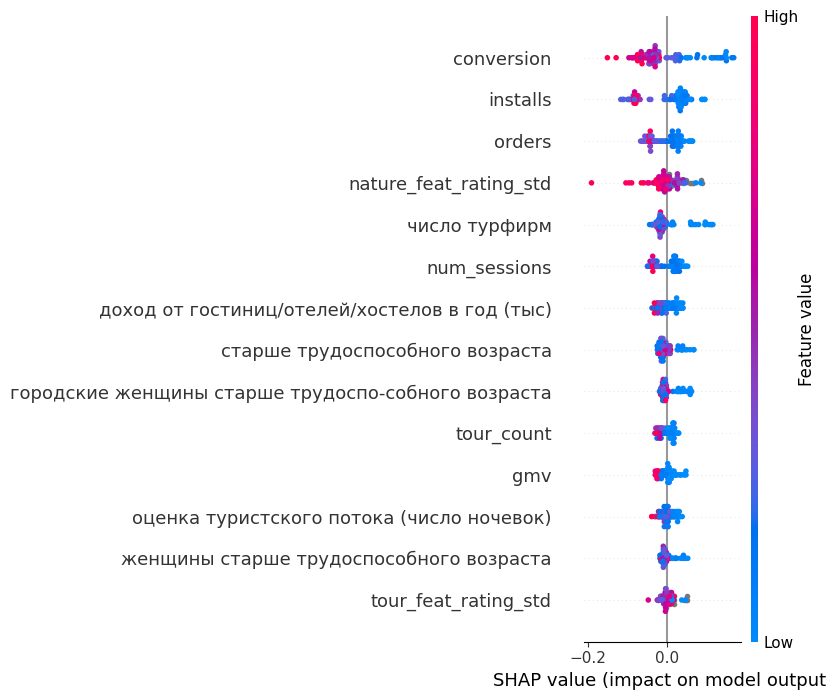

In [12]:
explainer = shap.TreeExplainer(model)

val_dataset = Pool(data=X_revenue_per_order_selected, label=y_revenue_per_order)
shap_values = explainer.shap_values(val_dataset)
shap.summary_plot(shap_values, X_revenue_per_order_selected, max_display = 14)

In [13]:
X_revenue = full_data.drop(columns=['region', 'region_russian', 'revenue', 'revenue_quartile', 'revenue_per_order'])
y_revenue = full_data['revenue_per_order']

In [16]:
model_revenue = CatBoostRegressor(random_state=42, verbose=300).fit(X_revenue_per_order, y_revenue_per_order)

Learning rate set to 0.028227
0:	learn: 0.3874574	total: 4.67ms	remaining: 4.66s
300:	learn: 0.0468840	total: 1.26s	remaining: 2.92s
600:	learn: 0.0093398	total: 2.51s	remaining: 1.67s
900:	learn: 0.0022841	total: 3.65s	remaining: 402ms
999:	learn: 0.0015704	total: 4.14s	remaining: 0us


In [17]:
ft = model_revenue.get_feature_importance(prettified=True)
ft

,Feature Id,Importances
0,conversion,11.891068
1,число турфирм,6.659947
2,tour_feat_rating_std,5.966542
3,installs,5.280465
4,num_sessions,4.605080
5,nature_feat_rating_std,4.270631
6,женщины старше трудоспособного возраста,4.009506
7,orders,3.892699
8,20тый персентиль дохода,3.251397
9,население с доходом ниже границы бедности,2.345027


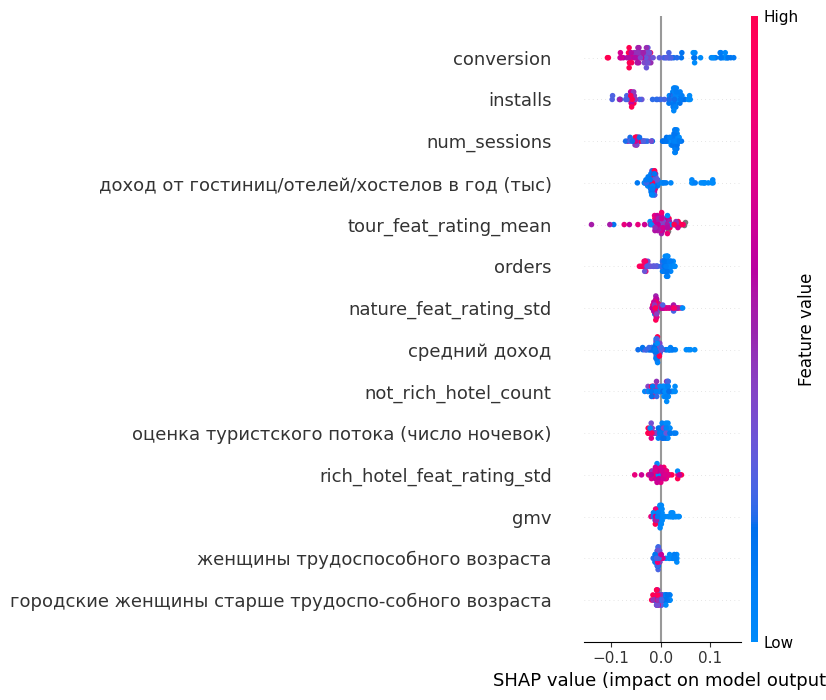

In [18]:
explainer = shap.TreeExplainer(model_revenue)

val_dataset = Pool(data=X_revenue, label=y_revenue)
shap_values = explainer.shap_values(val_dataset)
shap.summary_plot(shap_values, X_revenue, max_display = 14)

In [19]:
revenue_features = ft['Feature Id'][:25]
X_revenue_selected = X_revenue[revenue_features]

In [20]:
model_revenue_selected = CatBoostRegressor(random_state=42, verbose=300).fit(X_revenue_selected, y_revenue)

Learning rate set to 0.028227
0:	learn: 0.3869189	total: 6.03ms	remaining: 6.02s
300:	learn: 0.0463759	total: 809ms	remaining: 1.88s
600:	learn: 0.0121759	total: 1.51s	remaining: 1s
900:	learn: 0.0035020	total: 2.21s	remaining: 243ms
999:	learn: 0.0023029	total: 2.44s	remaining: 0us


In [21]:
ft = model_revenue_selected.get_feature_importance(prettified=True)
ft

,Feature Id,Importances
0,conversion,10.621107
1,installs,9.621330
2,nature_feat_rating_std,9.047181
3,число турфирм,7.813554
4,orders,5.004845
5,tour_feat_rating_std,4.671680
6,городские женщины старше трудоспо-собного возр...,4.538376
7,старше трудоспособного возраста,4.451603
8,num_sessions,3.772902
9,gmv,3.548291


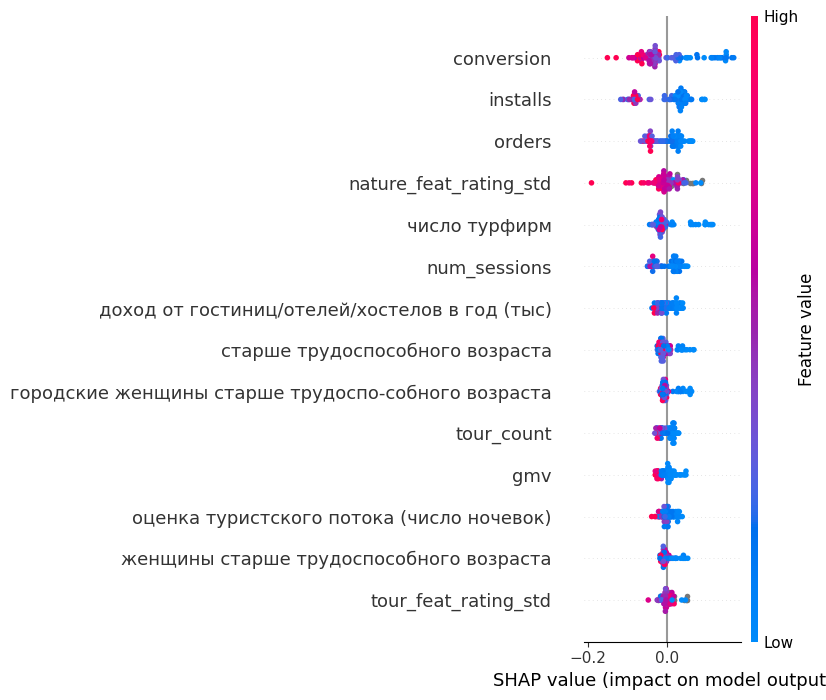

In [22]:
explainer = shap.TreeExplainer(model_revenue_selected)

val_dataset = Pool(data=X_revenue_selected, label=y_revenue)
shap_values = explainer.shap_values(val_dataset)
shap.summary_plot(shap_values, X_revenue_selected, max_display = 14)